In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

In [7]:
df = pd.read_csv("./out/benchmark.csv", header=None)

In [8]:
df

,0,1,2,3,4,5,6
0,Eval\1\easy\1.lp,0,0,25,1,46875000.0,65983700.0
1,Eval\1\easy\2.lp,31250000,0,25,1,140625000.0,209121400.0
2,Eval\1\easy\3.lp,0,0,25,1,296875000.0,408725900.0
3,Eval\1\easy\4.lp,15625000,2,25,1,640625000.0,715052500.0
4,Eval\1\easy\5.lp,0,1,25,1,640625000.0,745793100.0
...,...,...,...,...,...,...,...
595,Eval\10\hard\16.lp,0,7,25,1,NaN,NaN
596,Eval\10\hard\17.lp,0,7,25,1,NaN,NaN
597,Eval\10\hard\18.lp,0,7,25,1,NaN,NaN
598,Eval\10\hard\19.lp,0,7,25,1,NaN,NaN


In [28]:
df

,0,1,2,3,4,5,6
0,Eval\1\easy\1.lp,0,0,25,1,46875000.0,65983700.0
1,Eval\1\easy\2.lp,31250000,0,25,1,140625000.0,209121400.0
2,Eval\1\easy\3.lp,0,0,25,1,296875000.0,408725900.0
3,Eval\1\easy\4.lp,15625000,2,25,1,640625000.0,715052500.0
4,Eval\1\easy\5.lp,0,1,25,1,640625000.0,745793100.0
...,...,...,...,...,...,...,...
595,Eval\10\hard\16.lp,0,7,25,1,NaN,NaN
596,Eval\10\hard\17.lp,0,7,25,1,NaN,NaN
597,Eval\10\hard\18.lp,0,7,25,1,NaN,NaN
598,Eval\10\hard\19.lp,0,7,25,1,NaN,NaN


In [36]:
df_easy = df.where(df[0].str.contains("easy"))
df_easy = df_easy[df_easy[0].notna()]

df_medium = df.where(df[0].str.contains("medium"))
df_medium = df_medium[df_medium[0].notna()]

df_hard = df.where(df[0].str.contains("hard"))
df_hard = df_hard[df_hard[0].notna()]


In [37]:
df_easy

,0,1,2,3,4,5,6
0,Eval\1\easy\1.lp,0.0,0.0,25.0,1.0,46875000.0,65983700.0
1,Eval\1\easy\2.lp,31250000.0,0.0,25.0,1.0,140625000.0,209121400.0
2,Eval\1\easy\3.lp,0.0,0.0,25.0,1.0,296875000.0,408725900.0
3,Eval\1\easy\4.lp,15625000.0,2.0,25.0,1.0,640625000.0,715052500.0
4,Eval\1\easy\5.lp,0.0,1.0,25.0,1.0,640625000.0,745793100.0
...,...,...,...,...,...,...,...
555,Eval\10\easy\16.lp,0.0,5.0,25.0,1.0,NaN,NaN
556,Eval\10\easy\17.lp,0.0,5.0,25.0,1.0,NaN,NaN
557,Eval\10\easy\18.lp,0.0,5.0,25.0,1.0,NaN,NaN
558,Eval\10\easy\19.lp,0.0,5.0,25.0,1.0,NaN,NaN


In [38]:
df_medium

,0,1,2,3,4,5,6
20,Eval\1\medium\1.lp,0.0,0.0,25.0,1.0,4.687500e+07,7.834520e+07
21,Eval\1\medium\2.lp,15625000.0,0.0,25.0,1.0,2.343750e+08,2.640939e+08
22,Eval\1\medium\3.lp,15625000.0,2.0,25.0,1.0,7.343750e+08,8.175769e+08
23,Eval\1\medium\4.lp,15625000.0,3.0,25.0,1.0,1.015625e+09,1.221618e+09
24,Eval\1\medium\5.lp,15625000.0,0.0,25.0,1.0,7.031250e+08,7.724221e+08
...,...,...,...,...,...,...,...
575,Eval\10\medium\16.lp,15625000.0,1.0,25.0,1.0,NaN,NaN
576,Eval\10\medium\17.lp,15625000.0,1.0,25.0,1.0,NaN,NaN
577,Eval\10\medium\18.lp,15625000.0,1.0,25.0,1.0,NaN,NaN
578,Eval\10\medium\19.lp,15625000.0,1.0,25.0,1.0,NaN,NaN


In [39]:
df_hard

,0,1,2,3,4,5,6
40,Eval\1\hard\1.lp,0.0,0.0,25.0,1.0,31250000.0,54701500.0
41,Eval\1\hard\2.lp,0.0,0.0,25.0,1.0,93750000.0,114454300.0
42,Eval\1\hard\3.lp,0.0,1.0,25.0,1.0,281250000.0,304495200.0
43,Eval\1\hard\4.lp,0.0,1.0,25.0,1.0,390625000.0,425193400.0
44,Eval\1\hard\5.lp,0.0,6.0,25.0,1.0,750000000.0,790770500.0
...,...,...,...,...,...,...,...
595,Eval\10\hard\16.lp,0.0,7.0,25.0,1.0,NaN,NaN
596,Eval\10\hard\17.lp,0.0,7.0,25.0,1.0,NaN,NaN
597,Eval\10\hard\18.lp,0.0,7.0,25.0,1.0,NaN,NaN
598,Eval\10\hard\19.lp,0.0,7.0,25.0,1.0,NaN,NaN


In [173]:
def get_x(instance, other_df):
    some_df = df.where(other_df[0].str.contains(instance, regex=False))
    some_df = some_df[some_df[0].notna()][6]
    return some_df



In [228]:
easy_1 = get_x("\\1.lp", df_easy)
easy_2 = get_x("\\2.lp", df_easy)
easy_3 = get_x("\\3.lp", df_easy)
easy_4 = get_x("\\4.lp", df_easy)
easy_5 = get_x("\\5.lp", df_easy)
easy_6 = get_x("\\6.lp", df_easy)
easy_7 = get_x("\\7.lp", df_easy)
easy_8 = get_x("\\8.lp", df_easy)
easy_9 = get_x("\\9.lp", df_easy)
easy_10 = get_x("\\10.lp", df_easy)
easy_11 = get_x("\\11.lp", df_easy)
easy_12 = get_x("\\12.lp", df_easy)
easy_13 = get_x("\\13.lp", df_easy)
easy_14 = get_x("\\14.lp", df_easy)
easy_15 = get_x("\\15.lp", df_easy)
easy_16 = get_x("\\16.lp", df_easy)
easy_17 = get_x("\\17.lp", df_easy)
easy_18 = get_x("\\18.lp", df_easy)
easy_19 = get_x("\\19.lp", df_easy)
easy_20 = get_x("\\20.lp", df_easy)

In [229]:
medium_1 = get_x("\\1.lp", df_medium)
medium_2 = get_x("\\2.lp", df_medium)
medium_3 = get_x("\\3.lp", df_medium)
medium_4 = get_x("\\4.lp", df_medium)
medium_5 = get_x("\\5.lp", df_medium)
medium_6 = get_x("\\6.lp", df_medium)
medium_7 = get_x("\\7.lp", df_medium)
medium_8 = get_x("\\8.lp", df_medium)
medium_9 = get_x("\\9.lp", df_medium)
medium_10 = get_x("\\10.lp", df_medium)
medium_11 = get_x("\\11.lp", df_medium)
medium_12 = get_x("\\12.lp", df_medium)
medium_13 = get_x("\\13.lp", df_medium)
medium_14 = get_x("\\14.lp", df_medium)
medium_15 = get_x("\\15.lp", df_medium)
medium_16 = get_x("\\16.lp", df_medium)
medium_17 = get_x("\\17.lp", df_medium)
medium_18 = get_x("\\18.lp", df_medium)
medium_19 = get_x("\\19.lp", df_medium)
medium_20 = get_x("\\20.lp", df_medium)

In [240]:
hard_1 = get_x("\\1.lp", df_hard)
hard_2 = get_x("\\2.lp", df_hard)
hard_3 = get_x("\\3.lp", df_hard)
hard_4 = get_x("\\4.lp", df_hard)
hard_5 = get_x("\\5.lp", df_hard)
hard_6 = get_x("\\6.lp", df_hard)
hard_7 = get_x("\\7.lp", df_hard)
hard_8 = get_x("\\8.lp", df_hard)
hard_9 = get_x("\\9.lp", df_hard)
hard_10 = get_x("\\10.lp", df_hard)
hard_11 = get_x("\\11.lp", df_hard)
hard_12 = get_x("\\12.lp", df_hard)
hard_13 = get_x("\\13.lp", df_hard)
hard_14 = get_x("\\14.lp", df_hard)
hard_15 = get_x("\\15.lp", df_hard)
hard_16 = get_x("\\16.lp", df_hard)
hard_17 = get_x("\\17.lp", df_hard)
hard_18 = get_x("\\18.lp", df_hard)
hard_19 = get_x("\\19.lp", df_hard)
hard_20 = get_x("\\20.lp", df_hard)

In [243]:
(hard_5*1e-9).mean()

0.88895199

In [247]:
print((easy_6*1e-9).mean())
print((easy_7*1e-9).mean())
print((easy_8*1e-9).mean())
print((easy_9*1e-9).mean())
print((easy_10*1e-9).mean())
print((easy_11*1e-9).mean())


1.70488114
5.58893586
84.42883192000002
94.26128775000001
86.637595825
336.24950746666667


In [335]:
easy_time = [
    (easy_1*1e-9).mean(),
    (easy_2*1e-9).mean(),
    (easy_3*1e-9).mean(),
    (easy_4*1e-9).mean(),
    (easy_5*1e-9).mean(),
    (easy_6*1e-9).mean(),
    (easy_7*1e-9).mean(),
    (easy_8*1e-9).mean(),
    (easy_9*1e-9).mean(),
    (easy_10*1e-9).mean(),
    (easy_11*1e-9).mean(),
]

In [336]:
easy_time.insert(0,"0")

In [337]:
easy_time

['0',
 0.08754658000000001,
 0.15937679999999999,
 0.28180057000000003,
 0.50945628,
 0.7556300900000001,
 1.70488114,
 5.58893586,
 84.42883192000002,
 94.26128775000001,
 86.637595825,
 336.24950746666667]

In [338]:
print((medium_6*1e-9).mean())
print((medium_7*1e-9).mean())
print((medium_8*1e-9).mean())
print((medium_9*1e-9).mean())
print((medium_10*1e-9).mean())
print((medium_11*1e-9).mean())


3.15740923
15.979625340000002
17.287612944444444
132.2348538625
175.1673376
205.36084385


In [339]:
medium_time = [
    (medium_1*1e-9).mean(),
    (medium_2*1e-9).mean(),
    (medium_3*1e-9).mean(),
    (medium_4*1e-9).mean(),
    (medium_5*1e-9).mean(),
    (medium_6*1e-9).mean(),
    (medium_7*1e-9).mean(),
    (medium_8*1e-9).mean(),
    (medium_9*1e-9).mean(),
    (medium_10*1e-9).mean(),
    (medium_11*1e-9).mean(),
]

In [340]:
medium_time.insert(0,"20")

In [341]:
medium_time

['20',
 0.07631004,
 0.16937244,
 0.30538551,
 0.6147695699999999,
 0.9409522000000001,
 3.15740923,
 15.979625340000002,
 17.287612944444444,
 132.2348538625,
 175.1673376,
 205.36084385]

In [342]:
print((hard_6*1e-9).mean())
print((hard_7*1e-9).mean())
print((hard_8*1e-9).mean())
print((hard_9*1e-9).mean())
print((hard_10*1e-9).mean())
print((hard_11*1e-9).mean())

8.30843334
4.8966949
20.042897222222223
196.97172474444446
121.56690047500001
267.656517


In [343]:
hard_time = [
    (hard_1*1e-9).mean(),
    (hard_2*1e-9).mean(),
    (hard_3*1e-9).mean(),
    (hard_4*1e-9).mean(),
    (hard_5*1e-9).mean(),
    (hard_6*1e-9).mean(),
    (hard_7*1e-9).mean(),
    (hard_8*1e-9).mean(),
    (hard_9*1e-9).mean(),
    (hard_10*1e-9).mean(),
    (hard_11*1e-9).mean(),
]

In [344]:
hard_time.insert(0,"40")

In [345]:
hard_time

['40',
 0.06529102000000002,
 0.11859723000000003,
 0.22949537000000003,
 0.4682191400000001,
 0.88895199,
 8.30843334,
 4.8966949,
 20.042897222222223,
 196.97172474444446,
 121.56690047500001,
 267.656517]

In [353]:
test_df = pd.DataFrame(columns=["obstacles %","1","2","3","4","5","6","7","8","9","10","11"])

In [354]:
df_length = len(test_df)
test_df.loc[df_length] = easy_time

df_length = len(test_df)
test_df.loc[df_length] = medium_time

df_length = len(test_df)
test_df.loc[df_length] = hard_time

In [355]:
test_df

,obstacles %,1,2,3,4,5,6,7,8,9,10,11
0,0,0.087547,0.159377,0.281801,0.509456,0.755630,1.704881,5.588936,84.428832,94.261288,86.637596,336.249507
1,20,0.076310,0.169372,0.305386,0.614770,0.940952,3.157409,15.979625,17.287613,132.234854,175.167338,205.360844
2,40,0.065291,0.118597,0.229495,0.468219,0.888952,8.308433,4.896695,20.042897,196.971725,121.566900,267.656517


## Kopierte Daten Falls notwendig

In [356]:
easy_1 = 10-get_x("\\1.lp", df_easy).isna().sum()
easy_2 = 10-get_x("\\2.lp", df_easy).isna().sum()
easy_3 = 10-get_x("\\3.lp", df_easy).isna().sum()
easy_4 = 10-get_x("\\4.lp", df_easy).isna().sum()
easy_5 = 10-get_x("\\5.lp", df_easy).isna().sum()
easy_6 = 10-get_x("\\6.lp", df_easy).isna().sum()
easy_7 = 10-get_x("\\7.lp", df_easy).isna().sum()
easy_8 = 10-get_x("\\8.lp", df_easy).isna().sum()
easy_9 = 10-get_x("\\9.lp", df_easy).isna().sum()
easy_10 = 10-get_x("\\10.lp", df_easy).isna().sum()
easy_11 = 10-get_x("\\11.lp", df_easy).isna().sum()
easy_12 = 10-get_x("\\12.lp", df_easy).isna().sum()
easy_13 = 10-get_x("\\13.lp", df_easy).isna().sum()
easy_14 = 10-get_x("\\14.lp", df_easy).isna().sum()
easy_15 = 10-get_x("\\15.lp", df_easy).isna().sum()
easy_16 = 10-get_x("\\16.lp", df_easy).isna().sum()
easy_17 = 10-get_x("\\17.lp", df_easy).isna().sum()
easy_18 = 10-get_x("\\18.lp", df_easy).isna().sum()
easy_19 = 10-get_x("\\19.lp", df_easy).isna().sum()
easy_20 = 10-get_x("\\20.lp", df_easy).isna().sum()

easy_list = [easy_1, easy_2, easy_3, easy_4, easy_5, easy_6, easy_7, easy_8, easy_9, easy_10, easy_11, easy_12, 
             easy_13, easy_14, easy_15, easy_16, easy_17, easy_18, easy_19, easy_20]
easy_list = np.asarray(easy_list[:14])/10

easy_list

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 0.4, 0.3, 0.1, 0. ,
       0. ])

In [357]:
medium_1 = 10-get_x("\\1.lp", df_medium).isna().sum()
medium_2 = 10-get_x("\\2.lp", df_medium).isna().sum()
medium_3 = 10-get_x("\\3.lp", df_medium).isna().sum()
medium_4 = 10-get_x("\\4.lp", df_medium).isna().sum()
medium_5 = 10-get_x("\\5.lp", df_medium).isna().sum()
medium_6 = 10-get_x("\\6.lp", df_medium).isna().sum()
medium_7 = 10-get_x("\\7.lp", df_medium).isna().sum()
medium_8 = 10-get_x("\\8.lp", df_medium).isna().sum()
medium_9 = 10-get_x("\\9.lp", df_medium).isna().sum()
medium_10 = 10-get_x("\\10.lp", df_medium).isna().sum()
medium_11 = 10-get_x("\\11.lp", df_medium).isna().sum()
medium_12 = 10-get_x("\\12.lp", df_medium).isna().sum()
medium_13 = 10-get_x("\\13.lp", df_medium).isna().sum()
medium_14 = 10-get_x("\\14.lp", df_medium).isna().sum()
medium_15 = 10-get_x("\\15.lp", df_medium).isna().sum()
medium_16 = 10-get_x("\\16.lp", df_medium).isna().sum()
medium_17 = 10-get_x("\\17.lp", df_medium).isna().sum()
medium_18 = 10-get_x("\\18.lp", df_medium).isna().sum()
medium_19 = 10-get_x("\\19.lp", df_medium).isna().sum()
medium_20 = 10-get_x("\\20.lp", df_medium).isna().sum()

medium_list = [medium_1, medium_2, medium_3, medium_4, medium_5, medium_6, medium_7, medium_8, medium_9, medium_10, medium_11, medium_12, 
             medium_13, medium_14, medium_15, medium_16, medium_17, medium_18, medium_19, medium_20]
medium_list = np.asarray(medium_list[:14])/10

medium_list

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 0.8, 0.5, 0.2, 0. , 0. ,
       0. ])

In [358]:
hard_1 = 10-get_x("\\1.lp", df_hard).isna().sum()
hard_2 = 10-get_x("\\2.lp", df_hard).isna().sum()
hard_3 = 10-get_x("\\3.lp", df_hard).isna().sum()
hard_4 = 10-get_x("\\4.lp", df_hard).isna().sum()
hard_5 = 10-get_x("\\5.lp", df_hard).isna().sum()
hard_6 = 10-get_x("\\6.lp", df_hard).isna().sum()
hard_7 = 10-get_x("\\7.lp", df_hard).isna().sum()
hard_8 = 10-get_x("\\8.lp", df_hard).isna().sum()
hard_9 = 10-get_x("\\9.lp", df_hard).isna().sum()
hard_10 = 10-get_x("\\10.lp", df_hard).isna().sum()
hard_11 = 10-get_x("\\11.lp", df_hard).isna().sum()
hard_12 = 10-get_x("\\12.lp", df_hard).isna().sum()
hard_13 = 10-get_x("\\13.lp", df_hard).isna().sum()
hard_14 = 10-get_x("\\14.lp", df_hard).isna().sum()
hard_15 = 10-get_x("\\15.lp", df_hard).isna().sum()
hard_16 = 10-get_x("\\16.lp", df_hard).isna().sum()
hard_17 = 10-get_x("\\17.lp", df_hard).isna().sum()
hard_18 = 10-get_x("\\18.lp", df_hard).isna().sum()
hard_19 = 10-get_x("\\19.lp", df_hard).isna().sum()
hard_20 = 10-get_x("\\20.lp", df_hard).isna().sum()

hard_list = [hard_1, hard_2, hard_3, hard_4, hard_5, hard_6, hard_7, hard_8, hard_9, hard_10, hard_11, hard_12, 
             hard_13, hard_14, hard_15, hard_16, hard_17, hard_18, hard_19, hard_20]
hard_list = np.asarray(hard_list[:14])/10

hard_list

array([1. , 1. , 1. , 1. , 1. , 1. , 0.9, 0.9, 0.9, 0.4, 0.1, 0. , 0. ,
       0. ])

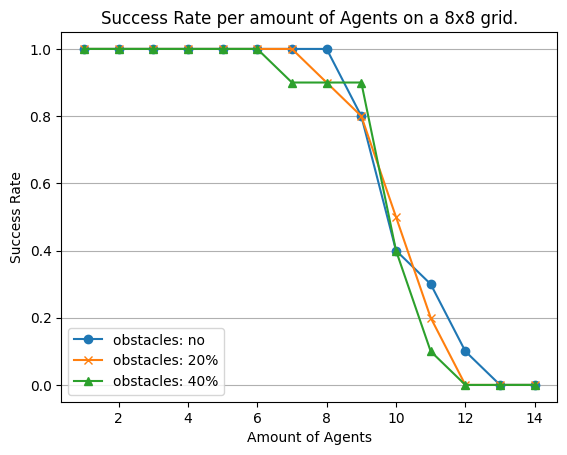

In [359]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.plot(x,easy_list[:18], label="obstacles: no", marker="o")
plt.plot(x,medium_list[:18], label="obstacles: 20%", marker="x")
plt.plot(x,hard_list[:18], label="obstacles: 40%", marker="^")

plt.grid(axis="y")
plt.legend(loc="lower left")
plt.title("Success Rate per amount of Agents on a 8x8 grid.")
plt.xlabel("Amount of Agents")
plt.ylabel("Success Rate")

plt.show()

In [194]:
x

(10,)